In [237]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('new.csv')
df.isnull().sum()[df.isnull().sum()/df.shape[0] > 0.20]

County                    252
StateAbbr                 252
PlaceName                 252
PlaceFIPS                 252
Place_TractID             252
Population2010            252
ACCESS2_CrudePrev         252
ARTHRITIS_CrudePrev       252
BINGE_CrudePrev           252
BPHIGH_CrudePrev          252
BPMED_CrudePrev           252
CANCER_CrudePrev          252
CASTHMA_CrudePrev         252
CHD_CrudePrev             252
CHECKUP_CrudePrev         252
CHOLSCREEN_CrudePrev      252
COLON_SCREEN_CrudePrev    252
COPD_CrudePrev            252
COREM_CrudePrev           255
COREW_CrudePrev           255
CSMOKING_CrudePrev        252
DENTAL_CrudePrev          252
DIABETES_CrudePrev        252
HIGHCHOL_CrudePrev        252
KIDNEY_CrudePrev          252
LPA_CrudePrev             252
MAMMOUSE_CrudePrev        252
MHLTH_CrudePrev           252
OBESITY_CrudePrev         252
PAPTEST_CrudePrev         252
PHLTH_CrudePrev           252
SLEEP_CrudePrev           252
STROKE_CrudePrev          252
TEETHLOST_

In [7]:
df.shape

(1201, 54)

In [298]:
df.geoid.value_counts()

48085031409    2
48085030524    2
48085031316    2
48113016301    2
48113012302    2
48085031802    2
48439113116    2
48113018129    2
48121021624    2
48121021627    2
48121021638    2
48113017808    2
48113015900    2
48121021637    2
48113017003    2
48439113002    2
48113012500    2
48085031900    2
48121021629    2
48121021632    2
48121021625    2
48121021616    2
48085030523    2
48085032011    2
48085030522    2
48113017900    2
48113018001    2
48085031804    2
48113018130    2
48439121605    1
              ..
48439113221    1
48121021753    1
48113008000    1
48113020300    1
48113014137    1
48121020103    1
48113016201    1
48113016202    1
48439113109    1
48439113108    1
48439113111    1
48113014136    1
48113003902    1
48113014124    1
48113014133    1
48113014127    1
48113014126    1
48113014121    1
48113014120    1
48113014123    1
48439111018    1
48113014132    1
48113003901    1
48113014135    1
48113014134    1
48113014129    1
48113014128    1
48113014131   

In [74]:
df_500 = pd.read_excel('500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release.xlsx')
df_coi = pd.read_csv('coi_locs.csv')
print(df_500.shape)
print(df_coi.shape)

(949, 64)
(2344, 43)


In [75]:
#filter coi only for 2015
df_coi_2015 = df_coi[df_coi['year'] == 2015]
df_coi_2015.shape

(1172, 43)

In [21]:
df_coi_2015['geoid'].isin(df_500.TractFIPS.values).sum()

920

In [76]:
df_coi_2015 = df_coi_2015[['HE_FOOD', 'HE_GREEN', 'HE_WALK', 'HE_VACANCY', 'HE_SUPRFND', 'HE_RSEI',
       'HE_PM25', 'HE_OZONE', 'HE_HEAT', 'HE_HLTHINS','latitude', 'longitude','geoid','countyfips']]

df_500 = df_500[['TractFIPS', 'County', 'StateAbbr', 'PlaceName',
       'PlaceFIPS', 'Place_TractID', 'Population2010', 'ACCESS2_CrudePrev',
       'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev',
       'BPMED_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
       'CHD_CrudePrev', 'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev',
       'COLON_SCREEN_CrudePrev', 'COPD_CrudePrev', 'COREM_CrudePrev',
       'COREW_CrudePrev', 'CSMOKING_CrudePrev', 'DENTAL_CrudePrev',
       'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev',
       'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'PHLTH_CrudePrev',
       'SLEEP_CrudePrev', 'STROKE_CrudePrev', 'TEETHLOST_CrudePrev']]

print(df_coi_2015.shape)
print(df_500.shape)

(1172, 14)
(949, 35)


In [77]:
impute_avgs = df_500[['TractFIPS','ACCESS2_CrudePrev',
       'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev',
       'BPMED_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
       'CHD_CrudePrev', 'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev',
       'COLON_SCREEN_CrudePrev', 'COPD_CrudePrev', 'COREM_CrudePrev',
       'COREW_CrudePrev', 'CSMOKING_CrudePrev', 'DENTAL_CrudePrev',
       'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev',
       'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'PHLTH_CrudePrev',
       'SLEEP_CrudePrev', 'STROKE_CrudePrev', 'TEETHLOST_CrudePrev']].copy()

impute_avgs[['ACCESS2_CrudePrev',
       'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev',
       'BPMED_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
       'CHD_CrudePrev', 'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev',
       'COLON_SCREEN_CrudePrev', 'COPD_CrudePrev', 'COREM_CrudePrev',
       'COREW_CrudePrev', 'CSMOKING_CrudePrev', 'DENTAL_CrudePrev',
       'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev',
       'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'PHLTH_CrudePrev',
       'SLEEP_CrudePrev', 'STROKE_CrudePrev', 'TEETHLOST_CrudePrev']] = impute_avgs.groupby('TractFIPS').transform('mean')

In [78]:
impute_avgs.drop('TractFIPS', axis = 1,inplace = True)

In [79]:
df_500[['ACCESS2_CrudePrev',
       'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev',
       'BPMED_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev',
       'CHD_CrudePrev', 'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev',
       'COLON_SCREEN_CrudePrev', 'COPD_CrudePrev', 'COREM_CrudePrev',
       'COREW_CrudePrev', 'CSMOKING_CrudePrev', 'DENTAL_CrudePrev',
       'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev',
       'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'PHLTH_CrudePrev',
       'SLEEP_CrudePrev', 'STROKE_CrudePrev', 'TEETHLOST_CrudePrev']] = impute_avgs

In [80]:
# df_500[df_500.duplicated(subset = ['TractFIPS'], keep = False)].sort_values(by = 'TractFIPS')

df_500.drop_duplicates(subset = ['TractFIPS'], inplace = True)

In [81]:
#merge data frames
df_merge = pd.merge(df_coi_2015,df_500,how = 'left', left_on = 'geoid', right_on = 'TractFIPS')
df_merge.shape

(1172, 49)

In [91]:
df_merge.rename({'HE_FOOD': 'COI_FOOD',
       'HE_GREEN': 'COI_GREEN','HE_WALK' : 'COI_WALK','HE_VACANCY' : 'COI_VACANCY','HE_SUPRFND' :'COI_SUPRFND',
                 'HE_RSEI' : 'COI_RSEI',
       'HE_PM25' : 'COI_PM25','HE_OZONE' : 'COI_OZONE','HE_HEAT' : 'COI_HEAT','HE_HLTHINS' : 'COI_HLTHINS'},
                axis = 1, inplace = True)

In [94]:
df_merge.drop(['TractFIPS','StateAbbr', 'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev', 'BPHIGH_CrudePrev', 'BPMED_CrudePrev',
       'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COPD_CrudePrev', 'COREM_CrudePrev', 'COREW_CrudePrev','DENTAL_CrudePrev', 'DIABETES_CrudePrev',
       'HIGHCHOL_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev',
       'MAMMOUSE_CrudePrev','SLEEP_CrudePrev',
       'STROKE_CrudePrev', 'TEETHLOST_CrudePrev','PAPTEST_CrudePrev'],axis = 1,inplace = True)

In [95]:
df_merge.columns

Index(['COI_FOOD', 'COI_GREEN', 'COI_WALK', 'COI_VACANCY', 'COI_SUPRFND',
       'COI_RSEI', 'COI_PM25', 'COI_OZONE', 'COI_HEAT', 'COI_HLTHINS',
       'latitude', 'longitude', 'geoid', 'countyfips', 'County', 'PlaceName',
       'PlaceFIPS', 'Place_TractID', 'Population2010', 'BINGE_CrudePrev',
       'CHECKUP_CrudePrev', 'CSMOKING_CrudePrev', 'MHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'PHLTH_CrudePrev'],
      dtype='object')

In [96]:
df_merge.shape

(1172, 25)

In [99]:
df_merge['geoid_div'] = df_merge['geoid'].apply(lambda x: int(str(x)[:8]))

health_imputed = df_merge.copy()

columns_impute = ['BINGE_CrudePrev',
       'CHECKUP_CrudePrev', 'CSMOKING_CrudePrev', 'MHLTH_CrudePrev',
       'OBESITY_CrudePrev', 'PHLTH_CrudePrev']

for col in columns_impute:
    health_imputed[col] = health_imputed.groupby('geoid_div')[col].apply(lambda col : col.fillna(col.mean()))

In [300]:
df_merge.geoid_div.nunique()

40

In [283]:
def model_output(data,columns_regress,target,multiply_cols,columns_impute = None,winsorize_outliers = None,winsorize_with_95 = False):
    '''
    input : data
          : columns to be imputed
          : columns to be regressed
          : target
          : winsorise_outliers : dictionary of limits for the respective columns{'col' : limit}
          : winsorise_outliers and columns_regress should have same length and same order and to preserve the cols order 
          send dict with limits [0,0] for cols without outliers
          
    output :returns multiplied data(high is good)
           :prints model summary
           :returns model coefficients  
    '''
    # imputing columns based on group means 
    if columns_impute:
        for col in columns_impute:
            data[col] = data.groupby('geoid_div')[col].apply(lambda col : col.fillna(col.mean()))
    else:
        data = data.dropna(how = 'any', axis = 0)
    
    # scaling x and y
    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(data[columns_regress].values)
    data_transformed = pd.DataFrame(data = X_transformed, columns = columns_regress)
    
    y = data[target].values.reshape(-1,1)
    y_transformed = StandardScaler().fit_transform(y) * -1
    
    # multiply with -1,1 to rescale everything as high is good and return that data
    for col,value in multiply_cols.items():
        data_transformed[col] = data_transformed[col] * value
    multiplied_data = data_transformed.copy()
            
    # winsorize based on the list or 95%
    if winsorize_outliers:
        X_transformed = np.zeros((data_transformed.shape[0],1))
        for col,limit in winsorise_outliers.items():
            x = data_transformed[col].values.reshape(-1,1)
            x = scipy.stats.mstats.winsorize(x, limits = limit) #by EDA we should come up with the percentile 
            X_transformed = np.hstack((X_transformed,x))
        X_transformed = X_transformed[:,1:]
        
    elif winsorize_with_95:
        X_transformed = np.zeros((data_transformed.shape[0],1))
        for col in columns_regress:
            x = data_transformed[col].values.reshape(-1,1)
            x = scipy.stats.mstats.winsorize(x, limits=[0, 0.05]) 
            X_transformed = np.hstack((X_transformed,x))
        X_transformed = X_transformed[:,1:]
        
    else:
        X_transformed = data_transformed.values
        
    # linear model
    X2 = sm.add_constant(X_transformed)
    lm_model = sm.OLS(y_transformed, X2)
    res = lm_model.fit()
    print(res.summary())
    
    params = res.params[1:] #returns without constant coefficient
    
    return multiplied_data, params
    

In [284]:
data = df_merge.copy()

## dont winsorize outliers and with target imputation

In [285]:
#regression of PHLTH_CrudePrev 

columns_impute = ['BINGE_CrudePrev',
       'CHECKUP_CrudePrev', 'CSMOKING_CrudePrev','OBESITY_CrudePrev', 'MHLTH_CrudePrev',
       'PHLTH_CrudePrev']
columns_regress = ['COI_FOOD', 'COI_GREEN', 'COI_WALK', 'COI_VACANCY', 'COI_SUPRFND',
       'COI_RSEI', 'COI_PM25', 'COI_OZONE', 'COI_HEAT', 'COI_HLTHINS','BINGE_CrudePrev',
       'CHECKUP_CrudePrev', 'CSMOKING_CrudePrev','OBESITY_CrudePrev']
multiplied_data = {'COI_FOOD': -1,'COI_GREEN': -1,'COI_WALK': 1,'COI_VACANCY': -1,'COI_SUPRFND':-1 ,'COI_RSEI': -1 ,
        'COI_PM25':-1 ,'COI_OZONE': -1,'COI_HEAT': -1, 'COI_HLTHINS': 1 ,'BINGE_CrudePrev': -1 , 
        'CHECKUP_CrudePrev': 1,'CSMOKING_CrudePrev': -1,'OBESITY_CrudePrev':-1}

target = 'PHLTH_CrudePrev'

multiplied_zscore_data_1, params_1 = model_output(data,columns_regress,target,multiplied_data,columns_impute)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1577.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:42:46   Log-Likelihood:                 94.736
No. Observations:                1172   AIC:                            -159.5
Df Residuals:                    1157   BIC:                            -83.48
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.516e-16      0.007   8.41e-14      1.0

In [286]:
#regression of MHLTH_CrudePrev 
data = df_merge.copy()
target = 'MHLTH_CrudePrev'

multiplied_zscore_data_2, params_2 = model_output(data,columns_regress,target,multiplied_data,columns_impute)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2683.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:43:28   Log-Likelihood:                 394.11
No. Observations:                1172   AIC:                            -758.2
Df Residuals:                    1157   BIC:                            -682.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.469e-17      0.005  -6.83e-15      1.0

## winsorize outliers and with target imputation

In [287]:
#regression of PHLTH_CrudePrev 
data = df_merge.copy()
target = 'PHLTH_CrudePrev'

multiplied_zscore_data_3, params_3 = model_output(data,columns_regress,target,multiplied_data,columns_impute,winsorize_with_95 = True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1483.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:43:48   Log-Likelihood:                 60.737
No. Observations:                1172   AIC:                            -91.47
Df Residuals:                    1157   BIC:                            -15.48
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.007     -0.410      0.6

In [288]:
#regression of MHLTH_CrudePrev 
data = df_merge.copy()
target = 'MHLTH_CrudePrev'

multiplied_zscore_data_4, params_4 = model_output(data,columns_regress,target,multiplied_data,columns_impute,winsorize_with_95 = True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2649.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:43:57   Log-Likelihood:                 386.82
No. Observations:                1172   AIC:                            -743.6
Df Residuals:                    1157   BIC:                            -667.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.005      2.398      0.0

## Dont winsorize outliers and without imputation

In [289]:
#regression of PHLTH_CrudePrev 
target = 'PHLTH_CrudePrev'

multiplied_zscore_data_5, params_5 = model_output(data,columns_regress,target,multiplied_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1283.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:44:01   Log-Likelihood:                 91.807
No. Observations:                 920   AIC:                            -153.6
Df Residuals:                     905   BIC:                            -81.25
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.665e-16      0.007  -2.29e-14      1.0

In [290]:
#regression of MHLTH_CrudePrev 
target = 'MHLTH_CrudePrev'

multiplied_zscore_data_6, params_6 = model_output(data,columns_regress,target,multiplied_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2224.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:44:06   Log-Likelihood:                 335.26
No. Observations:                 920   AIC:                            -640.5
Df Residuals:                     905   BIC:                            -568.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.255e-16      0.006  -4.04e-14      1.0

## Winsorize outliers and without imputation

In [ ]:
#regression of PHLTH_CrudePrev 
target = 'PHLTH_CrudePrev'

model_output(data,columns_regress,target,multiplied_data,winsorise_outliers = )

In [ ]:
#regression of MHLTH_CrudePrev 
target = 'MHLTH_CrudePrev'

model_output(data,columns_regress,target,multiplied_data,winsorise_outliers = )

In [150]:
health_imputed.describe()

,COI_FOOD,COI_GREEN,COI_WALK,COI_VACANCY,COI_SUPRFND,COI_RSEI,COI_PM25,COI_OZONE,COI_HEAT,COI_HLTHINS,latitude,longitude,geoid,countyfips,PlaceFIPS,Population2010,BINGE_CrudePrev,CHECKUP_CrudePrev,CSMOKING_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,geoid_div
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1.172000e+03,1172.000000,9.200000e+02,920.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1.172000e+03
mean,3.355284,37.726877,10.390550,6.971806,-13.565187,6.419435,10.353525,39.101656,111.002844,80.364690,32.867612,-96.947748,4.820937e+10,48209.327645,4.826447e+06,4348.803261,18.444185,66.294526,16.864616,13.416715,32.766910,11.932471,4.820937e+07
std,4.747541,16.807159,3.301263,4.790066,1.783615,0.887408,0.144831,1.113977,1.963753,11.453163,0.166308,0.243796,1.521335e+08,152.090994,1.398220e+04,2185.116525,2.808770,3.317370,4.559253,3.153643,5.861544,3.607344,1.521335e+05
min,0.000000,0.800000,2.793655,0.000000,-13.815511,2.335597,9.721476,37.193760,106.333340,60.399448,32.554790,-97.530460,4.808503e+10,48085.000000,4.801924e+06,75.000000,10.300000,56.000000,7.200000,7.300000,15.400000,4.500000,4.808503e+07
25%,0.554578,27.100000,7.684368,3.374985,-13.815511,5.755171,10.307699,38.223878,109.666660,70.904573,32.737970,-97.125350,4.811301e+10,48113.000000,4.819000e+06,2968.750000,16.900000,64.300000,13.844602,11.200000,29.067778,9.375000,4.811301e+07
50%,1.663144,37.200000,10.136266,6.248666,-13.815511,6.298260,10.390137,39.042976,111.333340,81.890800,32.847660,-96.888325,4.811302e+10,48113.000000,4.827000e+06,4133.500000,18.496078,65.915517,16.200000,12.750000,31.744828,10.820000,4.811302e+07
75%,3.998908,48.400000,13.184283,9.653158,-13.815511,6.893849,10.449581,39.740654,112.333340,90.340628,32.981273,-96.760918,4.843911e+10,48439.000000,4.830464e+06,5526.500000,19.929310,67.660000,19.900000,15.700000,36.025000,14.124138,4.843910e+07
max,25.929693,84.900000,16.942469,27.605244,0.000000,11.357561,10.544130,42.216727,114.000000,99.181026,33.391350,-96.377920,4.843912e+10,48439.000000,4.861796e+06,17241.000000,30.000000,81.300000,32.900000,23.700000,53.100000,23.400000,4.843912e+07


In [291]:
def get_weights(weights_1,weights_2):
    '''
    Input : provide weights of all y 
    Output : Averaged weights which totals to 1.
    '''
    weights = np.hstack((weights_1.reshape(-1,1),weights_2.reshape(-1,1)))
    weights = np.sum(weights,axis = 1) / weights.shape[1]
    weights = weights / np.sum(weights)
    
    return weights

In [292]:
def health_score(weights, multiplied_data):
    '''
    Converts multipled data to (0 to 100)scale using min max scaler and multiiplying with 100
    then it calculates health scores by multiplying weights with scaled x values.
    
    Input : weights
          : multiplied_data
          
    Output : data frame with health score(0 - 100) and x(0 - 100) for each cenusus tract.
    '''
    columns = list(multiplied_zscore_data_2.columns) + ['health_scores']
    scaled_data = MinMaxScaler().fit_transform(multiplied_data.values) * 100
    health_scores = np.dot(scaled_data,weights.reshape(-1,1))
    health_scores = MinMaxScaler().fit_transform(health_scores) * 100
    scaled_data = np.hstack((scaled_data,health_scores))
    
    scaled_data = pd.DataFrame(data = scaled_data, columns = columns)
    
    return scaled_data

In [293]:
# final scaled data
weights = get_weights(params_1,params_2)
scaled_data_100 = health_score(weights, multiplied_zscore_data_1)
scaled_data_100.head()

,COI_FOOD,COI_GREEN,COI_WALK,COI_VACANCY,COI_SUPRFND,COI_RSEI,COI_PM25,COI_OZONE,COI_HEAT,COI_HLTHINS,BINGE_CrudePrev,CHECKUP_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,health_scores
0,93.578145,100.000000,5.117820,75.820512,100.0,84.706150,80.069791,38.484809,86.956510,46.083927,47.606138,33.228530,74.208525,62.478900,75.676144
1,97.435579,99.048751,23.180105,92.272000,100.0,50.679497,58.446365,29.515733,100.000000,49.904863,47.606138,33.228530,74.208525,62.478900,76.264339
2,93.295466,99.643282,15.050599,66.284091,100.0,53.011046,63.463470,16.388819,95.652344,62.441860,47.606138,33.228530,74.208525,62.478900,77.191943
3,98.250686,95.243757,26.355059,82.421036,100.0,43.820198,72.430203,24.219938,100.000000,73.691887,47.606138,33.228530,74.208525,62.478900,77.632904
4,95.832622,92.627824,3.053978,79.706330,100.0,61.011483,32.948112,19.740966,86.956510,90.443962,38.578680,28.458498,71.984436,60.477454,78.808358


In [294]:
# concat scaled_data_100 with df_merge for lats,longs,geoid,....
final_data = pd.concat([df_merge[['geoid','latitude','longitude','countyfips']],scaled_data_100],axis = 1)
final_data.head()

,geoid,latitude,longitude,countyfips,COI_FOOD,COI_GREEN,COI_WALK,COI_VACANCY,COI_SUPRFND,COI_RSEI,COI_PM25,COI_OZONE,COI_HEAT,COI_HLTHINS,BINGE_CrudePrev,CHECKUP_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,health_scores
0,48085030100,33.29592,-96.39820,48085,93.578145,100.000000,5.117820,75.820512,100.0,84.706150,80.069791,38.484809,86.956510,46.083927,47.606138,33.228530,74.208525,62.478900,75.676144
1,48085030201,33.26331,-96.53734,48085,97.435579,99.048751,23.180105,92.272000,100.0,50.679497,58.446365,29.515733,100.000000,49.904863,47.606138,33.228530,74.208525,62.478900,76.264339
2,48085030202,33.34124,-96.64279,48085,93.295466,99.643282,15.050599,66.284091,100.0,53.011046,63.463470,16.388819,95.652344,62.441860,47.606138,33.228530,74.208525,62.478900,77.191943
3,48085030203,33.34176,-96.54547,48085,98.250686,95.243757,26.355059,82.421036,100.0,43.820198,72.430203,24.219938,100.000000,73.691887,47.606138,33.228530,74.208525,62.478900,77.632904
4,48085030301,33.24016,-96.70621,48085,95.832622,92.627824,3.053978,79.706330,100.0,61.011483,32.948112,19.740966,86.956510,90.443962,38.578680,28.458498,71.984436,60.477454,78.808358


In [295]:
weights_table = pd.DataFrame({'weights_1' : params_1, 'weights_2' : params_2, 'averaged_weights' : weights},index = columns_regress)
weights_table

,weights_1,weights_2,averaged_weights
COI_FOOD,-0.038881,0.026157,-0.011154
COI_GREEN,-0.065372,-0.005619,-0.062226
COI_WALK,-0.091330,-0.014971,-0.093176
COI_VACANCY,-0.017650,0.017150,-0.000438
COI_SUPRFND,0.008309,-0.006239,0.001815
COI_RSEI,-0.039384,-0.018887,-0.051076
COI_PM25,0.021901,-0.015810,0.005339
COI_OZONE,-0.001767,-0.004146,-0.005183
COI_HEAT,0.021458,0.035987,0.050352
COI_HLTHINS,0.088370,-0.001997,0.075709


In [256]:
np.sum(weights)

1.0

In [296]:
final_data.health_scores.describe()

count    1172.000000
mean       62.435722
std        18.497909
min         0.000000
25%        48.398565
50%        66.559624
75%        75.630297
max       100.000000
Name: health_scores, dtype: float64

In [297]:
final_data.to_csv('final_data.csv')

In [265]:
corr_concat = health_imputed[['PHLTH_CrudePrev','MHLTH_CrudePrev']].values
corr_concat = StandardScaler().fit_transform(corr_concat)
corr_concat = pd.DataFrame(data = corr_concat,columns = ['PHLTH_CrudePrev','MHLTH_CrudePrev'])
corr_concat = pd.concat([multiplied_zscore_data_1,corr_concat],axis = 1)

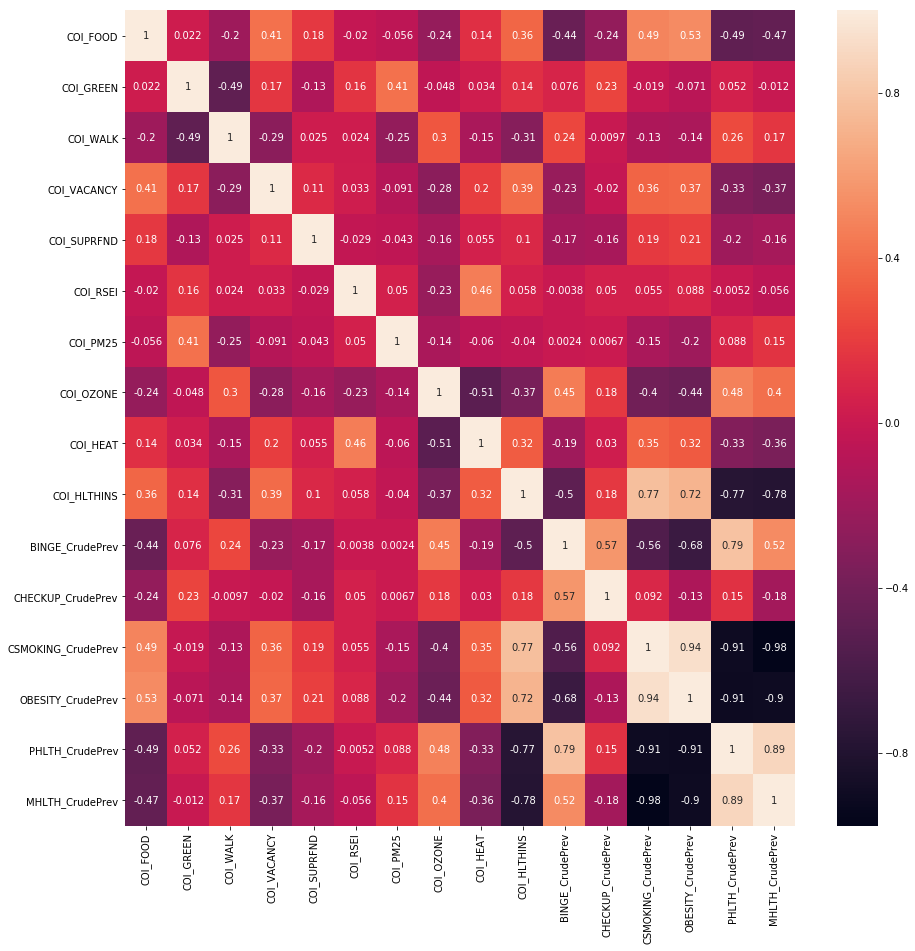

In [267]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_concat.corr(), annot = True)

In [279]:
corr_concat.corr().iloc[:,-2:]

,PHLTH_CrudePrev,MHLTH_CrudePrev
COI_FOOD,-0.486927,-0.473874
COI_GREEN,0.051914,-0.011816
COI_WALK,0.257880,0.167067
COI_VACANCY,-0.334057,-0.371229
COI_SUPRFND,-0.201438,-0.159356
COI_RSEI,-0.005190,-0.055925
COI_PM25,0.088495,0.152269
COI_OZONE,0.477393,0.397621
COI_HEAT,-0.325910,-0.364570
COI_HLTHINS,-0.769282,-0.784141
